<a href="https://colab.research.google.com/github/vineetbiyani09/ML/blob/master/EXP_4/J010_Exp_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np 
import pandas as pd 

In [19]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )

In [20]:
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [21]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Dataset has immigration from each country to Canada (1980-2013)

In [22]:
#To check dimension
df_can.shape

(195, 43)

In [23]:
#Drop Unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

In [24]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region','DevName':'Development_Status'}, inplace=True)

In [25]:
df_can.set_index('Country', inplace = True)
df_can['Total_Count']= df_can.sum(axis='columns')
years = range(1980,2014)
df_can.head()

,Continent,Continent-Region,Development_Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_Count
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl

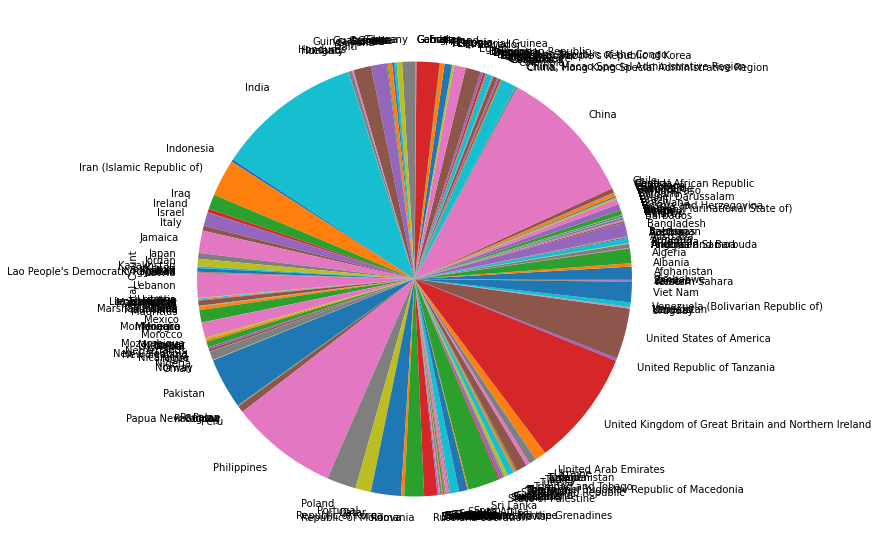

In [27]:
df_can['Total_Count'].plot(kind='pie',figsize=(10,10))

Create pi-charts

In [28]:
#filtering the countries
df_continents = df_can.groupby('Continent', axis='index').sum()
df_continents.head()
# can be grouped by development status 

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_Count
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Baseline Pie Chart

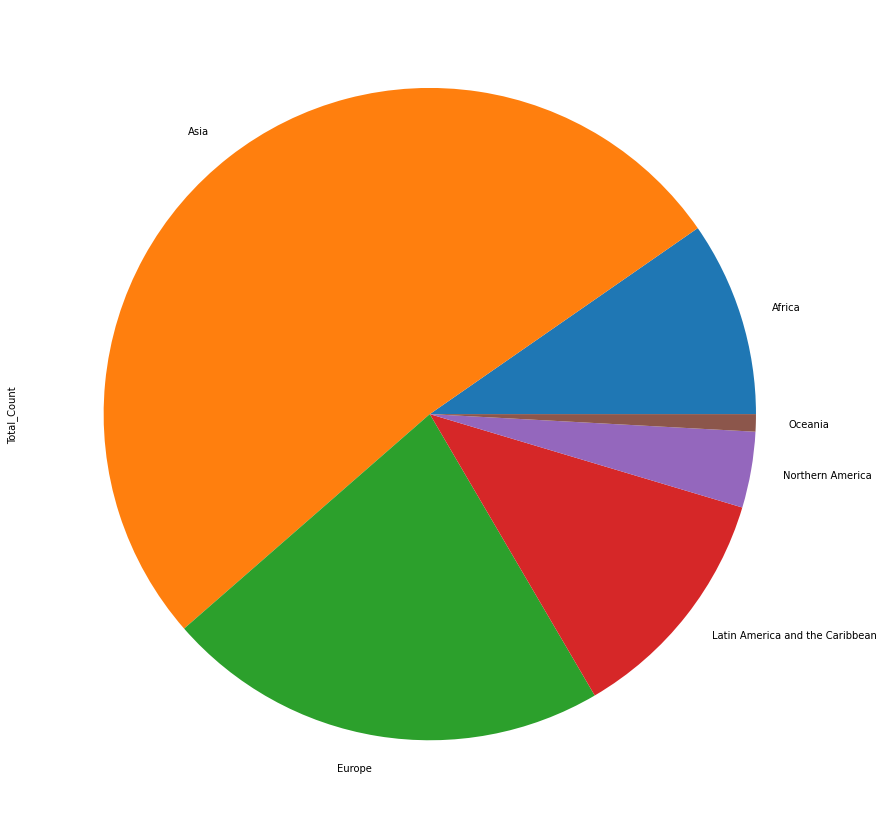

In [29]:
df_continents['Total_Count'].plot(kind='pie', figsize=(15,15))

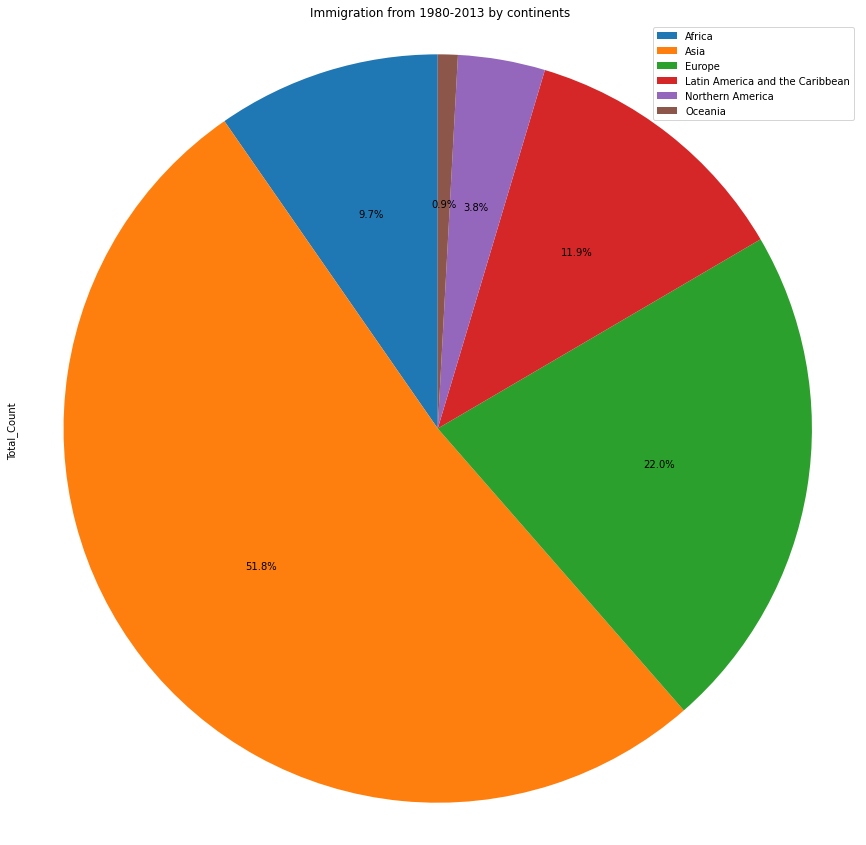

In [30]:
df_continents['Total_Count'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels = None
)
plt.title('Immigration from 1980-2013 by continents')
plt.axis('equal')
plt.legend(labels= df_continents.index,loc ='upper right')
plt.show()

In [31]:
df_devstatus = df_can.groupby('Development_Status', axis='index').sum()
df_devstatus.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_Count
Development_Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,75465,65368,72649,72520,70325,62359,63070,55322,42678,42605,45469,50634,43620,42137,47325,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,112589,142141,149038,149529,123340,125353,137015,137563,118049,137213,171243,192009,179491,175160,184758,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


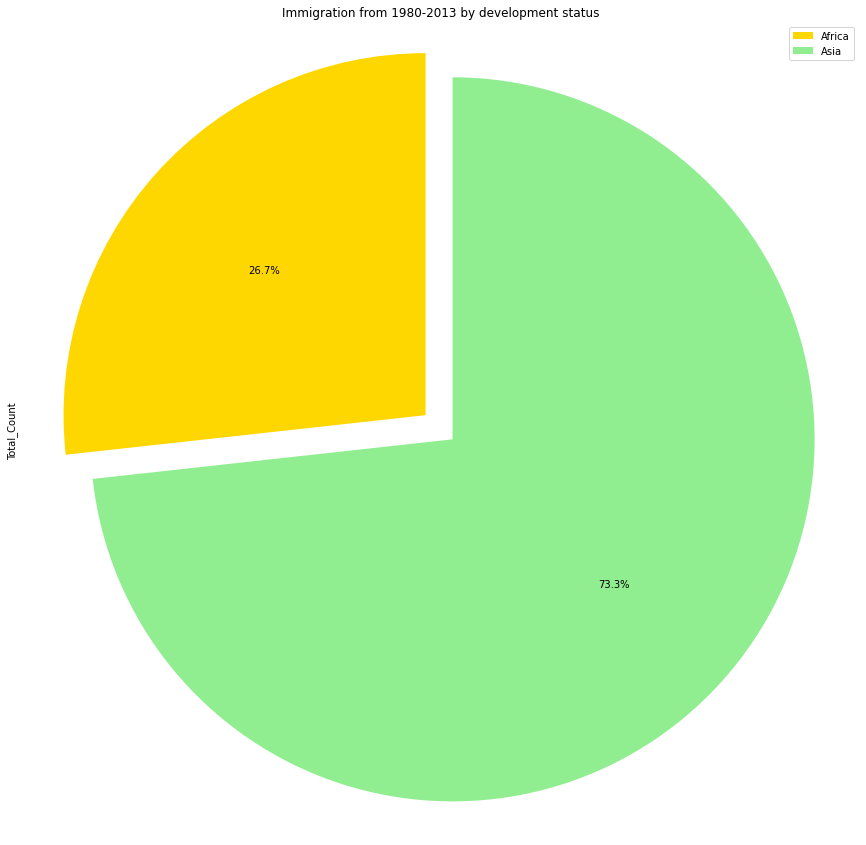

In [32]:
explodeList = [0.1,0]
colorList=['gold','lightgreen']
df_devstatus['Total_Count'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels = None,
    colors = colorList,
    explode = explodeList
)
plt.title('Immigration from 1980-2013 by development status')
plt.axis('equal')
plt.legend(labels= df_continents.index,loc ='upper right')
plt.show()

In [33]:
#By Continent-region pie-chart 
#use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.  
#filtering the countries
df_contreg = df_can.groupby('Continent-Region', axis='index').sum()
df_contreg.head()
df_contreg.shape

(22, 35)

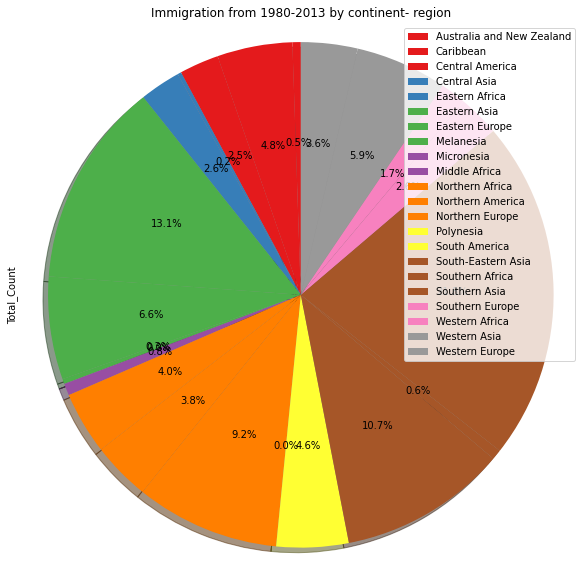

In [34]:
#explode lsit
explodeList = [0]*22
#colorlist
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
a=np.random.random(22)
cs=cm.Set1(np.arange(22)/22.)
df_contreg['Total_Count'].plot(
    kind='pie',
    figsize=(10,10),
    startangle=90,
    autopct='%1.1f%%',
    shadow=True,
    labels = None,
    colors = cs,    
    explode = explodeList
)
plt.title('Immigration from 1980-2013 by continent- region')
plt.axis('equal')
plt.legend(labels= df_contreg.index,loc ='upper right')
plt.show()
